My Portfolio
=================

In [1]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    tickers = pd.read_csv("/app/docs/tutorial/tickers.csv")
    loader = Loader()
    for row in tqdm(tickers.to_dict('record')):
        loader.get(row['Ticker'], expense_ratio=row['ExpenseRatio'] * 0.01)
    loader.save('/app/docs/tutorial/all.bin')

loader = Loader.load('/app/docs/tutorial/all.bin')
loader = loader.since(datetime(2013, 1, 1))
market = loader.get_market()

selected_tickers = ['SPY', 'QQQ', 'IEF', 'TLT', 'GLD']

In [2]:
from mypo import split_k_folds, select_by_regression
from mypo.optimizer import MaximumDiversificationOptimizer, MeanVarianceOptimizer, NoOptimizer, RiskParityOptimizer
from mypo.rebalancer import MonthlyRebalancer
from mypo import Runner

folds = split_k_folds(market, 1, 200)
fold = folds[0].filter(selected_tickers)

Reference Performance (SPY)
----------------------------------------

100%|██████████| 1943/1943 [00:25<00:00, 76.55it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [SPY, QQQ, IEF, TLT, GLD]             1.135155      0.716741   

   max draw down  max draw down span  
0       0.684511                 256  
              return       std  sharpe ratio  draw down
2013-12-31  0.107717  0.103056      0.851155   0.960065
2014-12-31  0.137727  0.110831      1.062218   0.927608
2015-12-31 -0.005750  0.152529     -0.168820   0.883691
2016-12-31  0.132401  0.125806      0.893444   0.871461
2017-12-31  0.199125  0.065400      2.738901   0.974260
2018-12-31 -0.051994  0.159898     -0.450249   0.816259
2019-12-31  0.292611  0.117284      2.324372   0.847985
2020-12-31  0.137905  0.307488      0.383445   0.684511
2021-12-31  0.120158  0.133276      0.751512   0.962113


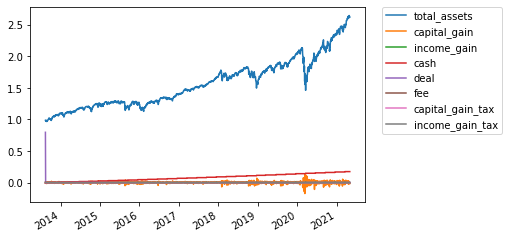

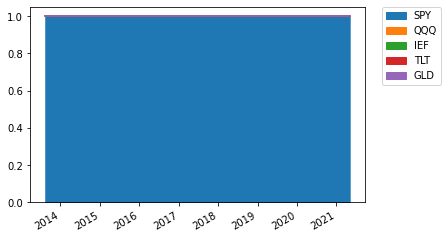

In [3]:
optimizer = NoOptimizer([1, 0, 0, 0, 0])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


MeanVarianceOptimizer with cost tolerance
----------------------------------------------------

100%|██████████| 1943/1943 [00:33<00:00, 58.46it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [SPY, QQQ, IEF, TLT, GLD]             1.098398      0.857443   

   max draw down  max draw down span  
0       0.869923                 232  
              return       std  sharpe ratio  draw down
2013-12-31  0.049858  0.073273      0.407494   0.976847
2014-12-31  0.163515  0.077819      1.844221   0.950022
2015-12-31  0.016148  0.092734     -0.041538   0.925439
2016-12-31  0.019372  0.064880     -0.009672   0.931583
2017-12-31  0.169172  0.055921      2.667557   0.946850
2018-12-31 -0.016204  0.137672     -0.262974   0.869923
2019-12-31  0.209965  0.064723      2.935058   0.898005
2020-12-31  0.219211  0.119918      1.661227   0.884563
2021-12-31 -0.039619  0.095657     -0.623259   0.917444


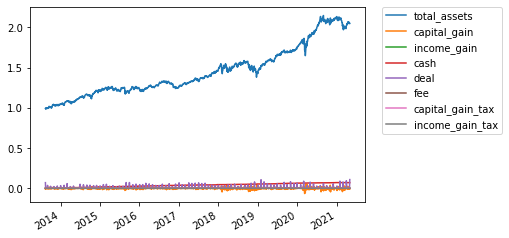

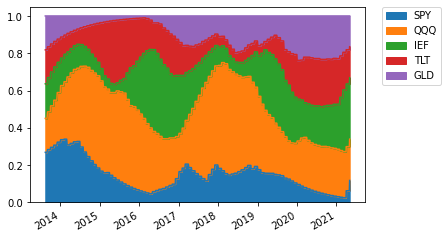

In [4]:
optimizer = MeanVarianceOptimizer(risk_tolerance=0.1, cost_tolerance=10, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


MeanVarianceOptimizer with static weight.
--------------------------------

100%|██████████| 1943/1943 [00:25<00:00, 76.29it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [SPY, QQQ, IEF, TLT, GLD]             1.130856      0.726425   

   max draw down  max draw down span  
0       0.698843                 228  
              return       std  sharpe ratio  draw down
2013-12-31  0.102686  0.098560      0.838946   0.962031
2014-12-31  0.135497  0.105048      1.099472   0.932207
2015-12-31 -0.004907  0.144833     -0.171968   0.889082
2016-12-31  0.126654  0.119471      0.892723   0.878895
2017-12-31  0.190739  0.061958      2.755705   0.976233
2018-12-31 -0.049209  0.152159     -0.454842   0.824820
2019-12-31  0.283014  0.111223      2.364745   0.855889
2020-12-31  0.137573  0.291836      0.402874   0.698843
2021-12-31  0.112710  0.128019      0.724189   0.962641


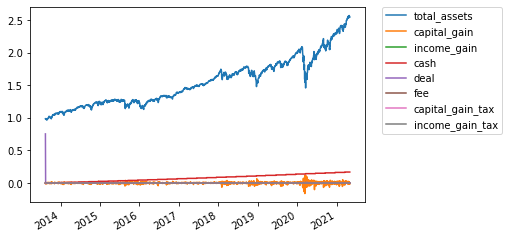

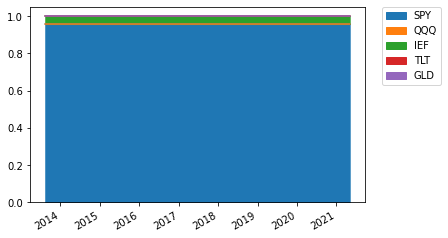

In [5]:
optimizer = MeanVarianceOptimizer(risk_tolerance=0.1)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

MaximumDiversificationOptimizer with static weight.
-----------------

100%|██████████| 1943/1943 [00:26<00:00, 74.03it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [SPY, QQQ, IEF, TLT, GLD]             1.079862      1.001871   

   max draw down  max draw down span  
0       0.905712                 208  
              return       std  sharpe ratio  draw down
2013-12-31  0.028140  0.062172      0.130934   0.979056
2014-12-31  0.120739  0.042745      2.356716   0.978884
2015-12-31  0.002994  0.060039     -0.283255   0.955068
2016-12-31  0.047358  0.051631      0.529880   0.939045
2017-12-31  0.106709  0.038936      2.226948   0.953078
2018-12-31 -0.009015  0.057246     -0.506841   0.947027
2019-12-31  0.173863  0.046732      3.292462   0.969278
2020-12-31  0.176529  0.094393      1.658267   0.905712
2021-12-31 -0.013697  0.079387     -0.424458   0.946686


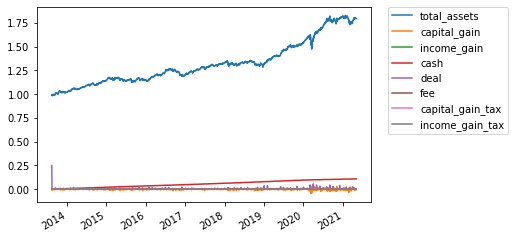

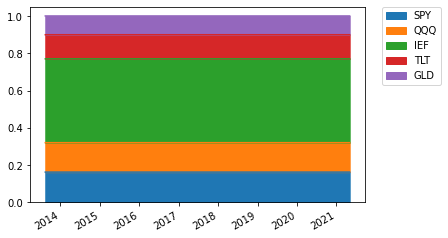

In [6]:
optimizer = MaximumDiversificationOptimizer()
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

RiskParityOptimizer with static weight.
-----------------

100%|██████████| 1943/1943 [00:25<00:00, 75.56it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [SPY, QQQ, IEF, TLT, GLD]             1.093135      1.076224   

   max draw down  max draw down span  
0       0.892061                 215  
              return       std  sharpe ratio  draw down
2013-12-31  0.041628  0.064155      0.337119   0.979843
2014-12-31  0.147718  0.046590      2.741298   0.977876
2015-12-31  0.006648  0.067435     -0.197998   0.947683
2016-12-31  0.052485  0.057582      0.564154   0.937878
2017-12-31  0.123943  0.041829      2.484950   0.955310
2018-12-31 -0.010950  0.069110     -0.447845   0.930286
2019-12-31  0.194481  0.052118      3.347817   0.953596
2020-12-31  0.192753  0.109959      1.571073   0.892061
2021-12-31 -0.009504  0.090315     -0.326678   0.942610


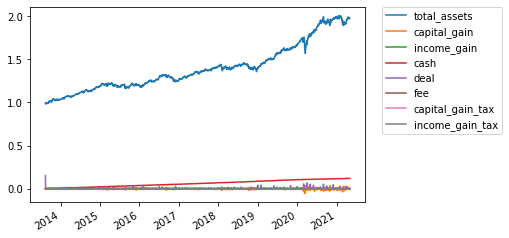

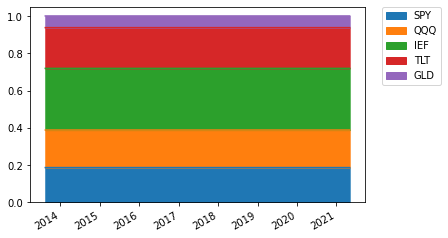

In [7]:
optimizer = RiskParityOptimizer(risk_target=[0.2, 0.25, 0.2, 0.25, 0.1])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()